In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

import random
np.random.seed(1001)
random.seed(1001)

# Create parameters

In [2]:
params = ob.fl_params(num_samples=10000, num_agents=10, size=500)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.fl_agents(params)
g = ob.fl_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 100
memory = [20, 30, 50, max_iter]
memory_bounds = {}
for m in memory:
    print(f"memory = {m}")
    prob.solve(rel_gap=10**(-10), abs_gap=10**(-10), max_iter=max_iter, memory=m, print_freq=10, minorant_update='agg_lin')
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

memory = 20


k=0, rel_gap=1.6767373885077049e+21, L=4.133904243507362e-18, U=6931.471805599453, L0=4.133904243507362e-18
k=10, rel_gap=1.1069432061375846, L=484.283154448177, U=1020.3571021114651, L0=484.283154448177
k=20, rel_gap=0.22913804227113066, L=770.9308631497408, U=947.5804518582654, L0=770.9308631497408
rho=1.2981583075836347
k=30, rel_gap=0.06979279531357077, L=873.3624971918276, U=934.3169071928859, L0=873.3624971918276
k=40, rel_gap=0.03069510748743875, L=889.6670818129309, U=916.9755085172147, L0=889.6670818129309
k=50, rel_gap=0.022388489557352263, L=895.0308272062516, U=915.0692155346671, L0=895.0308272062516
k=60, rel_gap=0.007998701547280614, L=905.6635473229305, U=912.9076797402181, L0=905.6635473229305
k=70, rel_gap=0.0034717732783502066, L=909.3856226289694, U=912.5428033333285, L0=909.3856226289694
k=80, rel_gap=0.0019110239322654562, L=910.5489308782816, U=912.2890116766887, L0=909.9897463370088
k=90, rel_gap=0.0007082161506104035, L=911.4628927525191, U=912.1084054938485, L0

# Centralized solution

In [5]:
h_cvx = ob.cvx_federated_learning(params=params)[2]

# Plot

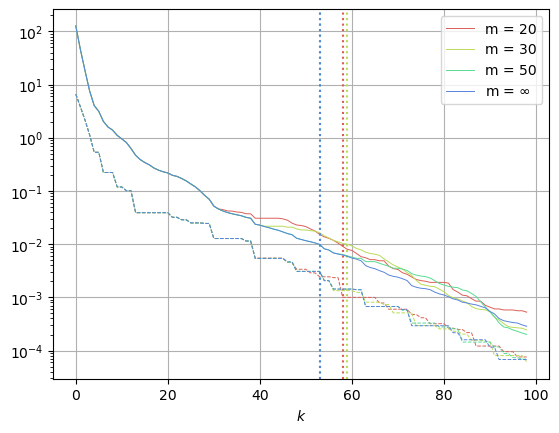

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx, filename='fl_fin_memory_agg.pdf')